zad 16 2

 Zajmiemy zbiorem danych z telefonów Samsung, dotyczących aktywności fizycznej. <br>
Dane są zebrane w pliku Samsung_HAR.zip. Należy je rozpakować i przeanalizować.<br> Do zrobienia: <br> Użyj poznanych met Obróbka danych wejściowych:<br> Czy potrzeba wszystkich cech? <br>Czy potrzebna jest jakaś obróbka? <br>Czy wiemy, jak obrobić?<br> Czy wiemy, co jaka cecha znaczy? <br>Czy potrzebujemy aż dwóch plików? Pamiętajmy, że mamy do czynienia z Unsupervised Learning.<br> Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?<br>od klasteringu, aby podzielić dany zbiór (pamiętaj o skalowaniu itp.).<br> Zwizualizuj podział przez każdy algorytm (możesz użyć metod z notatników). <br>Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej. <br>Typy czynności (dane zawarte w plikach *labels): <br>– marsz </br> – wchodzenie w górę po schodach <br>– schodzenie w dół ze schodów <br>– siedzenie <br> – stanie<br> – leżenie </br> Dobierz prawidłową ilość klastrów w przypadku metody KMeans.<br> Na danym zbiorze dokonaj prepr ocessingu, używając metod klasteringu. Następnie wyszkol dwa wybrane przez siebie klasyfikatory typu Supervised Learning i spróbuj uzyskać jak najlepszy wynik, używając wszystkich znanych sobie "wspomagaczy".  <br>     W przypadku użycia train_test_split albo KFold/StratifiedKFold, możemy połączyć zbiory, gdyż i tak wydzielamy zbiór walidacyjny.<br> Chyba że chcemy mieć dodatkowy zbiór testowy do przetestowania modeli po wyszkoleniu. Chcemy?<br> Ideą klasteringu jest podział na podgrupy, czyli tutaj oczekujemy, że nasze algorytmy podzielą zbiór na 6 wspomnianych klastrów: marsz, wchodzenie/schodzenie po schodach, siedzenie, stanie, leżenie. Zbadaj, jak są porozrzucane w różnych klastrach. Im bardziej są rozrzucone, tym algorytm gorzej sobie z nimi radzi. Ideałem jest: jeden klaster, jedna czynność.<br> Na koniec pytanie, na które należy również odpowiedzieć, a które pojawia się zawsze podczas rozmów kwalifikacyjnych: czym różni się KMeans, K-fold i K Nearest Neighbors (o tym ostatnim trzeba doczytać). <br>Rozwiązanie prześlij Mentorowi.

<br> Odpowiedzi</br>
<br> czy potrzebujemy wszystkich cech?    Nie, wiele cech jest silnie skorelowanych</br>
<br> czy potrzebna jest jakaś obróbka.?    Tak, usunięcie skorelowanych kolumn, usuniecie stalych kolumn, skalowanie</br>
<br> czy wiemy jak to zrbić?    Tak, analiza korelacji -> usunięcie redundantnych kolumn -> redukcja wymiarowości PCA </br>
<br> Czy wiemy co jaka cecha znaczy ?  dane pochodzą z akcelometra i żyroskopu i opisują rózne aktywności fizyczne</br>
<br> Czy potrzebujemy aż dwóch plików? Pamiętajmy, że mamy do czynienia z Unsupervised Learning ?Nie, w unsupervised łączymy dane w jeden zbiór</br>
<br> Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?  Nie, nie uczymy modelu predykcyjnego, badamy strukturę danych</br>




In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# budowa Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
#from dtreeviz import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# wczytywanie danych
samsung_x_train = pd.read_csv('samsung_train.txt',delim_whitespace=True, header=None)
samsung_y_train = pd.read_csv('samsung_train_labels.txt',delim_whitespace=True, header=None)

samsung_x_test = pd.read_csv('samsung_test.txt',delim_whitespace=True, header=None)
samsung_y_test = pd.read_csv('samsung_test_labels.txt',delim_whitespace=True, header=None)

C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  samsung_x_train = pd.read_csv('samsung_train.txt',delim_whitespace=True, header=None)
C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  samsung_y_train = pd.read_csv('samsung_train_labels.txt',delim_whitespace=True, header=None)
C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  samsung_x_test = pd.read_csv('samsung_test.txt',delim_whitespace=True, header=None)
C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:6: FutureWarning: The 'delim_whitespace' key

In [3]:
# do dalszej anlizy chce użyć połaczonych zbiorów
X = pd.concat([samsung_x_train, samsung_x_test], axis=0).reset_index(drop=True)
y = pd.concat([samsung_y_train, samsung_y_test], axis=0).reset_index(drop=True)

In [4]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.267383,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417


In [5]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
import numpy as np

# Oblicz macierz korelacji
corr_matrix = X.corr().abs()

# Górna trójkątna macierz, żeby uniknąć duplikatów
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Próg korelacji
threshold = 0.85

# Wybierz kolumny do usunięcia
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

# Usuń kolumny
X_reduced = X.drop(columns=to_drop)

print(f"Usunięto {len(to_drop)} kolumn o silnej korelacji: {to_drop}")
print(f"Nowy wymiar danych: {X_reduced.shape}")


Usunięto 386 kolumn o silnej korelacji: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 26, 30, 34, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 66, 67, 68, 70, 71, 72, 74, 75, 76, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 113, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 146, 150, 154, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 189, 193, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 239, 240, 241, 242, 244, 245, 246, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 297, 299, 301, 302, 303, 304, 305, 306, 307, 309, 310, 311, 312, 313, 314, 315, 316, 3

#### Udało się zmniejszyć ilość kolumn / zmiennych z 500 --> 175

In [7]:
# skalowanie zmiennych
from sklearn.preprocessing import StandardScaler

# Tworzymy obiekt skalera
scaler = StandardScaler()

# Dopasowanie i przekształcenie danych
scaled_array = scaler.fit_transform(X_reduced)

# Tworzymy nowy DataFrame z tymi samymi nazwami kolumn
X_reduced_scaled = pd.DataFrame(scaled_array, columns=X_reduced.columns)

print(X_reduced_scaled)

            0         1         2         3         22        24        25   \
0      0.210534 -0.068703 -0.452195 -0.883335 -0.664979 -1.206949  3.406648   
1      0.060208  0.035902 -0.275222 -0.890098 -1.329373 -1.122341  2.374280   
2      0.078460 -0.046427 -0.085548 -0.883565 -1.064051 -1.122341  1.273873   
3      0.071375 -0.227794 -0.270741 -0.885188 -1.140217 -2.048469  0.586241   
4      0.033738  0.031617 -0.121380 -0.889855 -1.484385 -1.639764  1.404682   
...         ...       ...       ...       ...       ...       ...       ...   
10294  0.529503 -0.960174  0.185107  0.729285  0.495969  0.984414 -0.707220   
10295  1.316644 -0.578309  0.056759  0.689343  0.891908  0.735797 -0.073752   
10296  1.118216  1.288059 -0.129415  0.634062  0.958773  0.884723  0.084108   
10297 -0.543493  0.975327  0.234320  0.648934  0.638665  1.386772  0.061199   
10298 -1.785153 -0.018666 -0.529760  0.633133  0.279344  1.137309 -0.460646   

            27        28        29   ...       538 

In [8]:
# redukcja wymiarów PCA
# redukcja do 2 zmiennych na potrzeby wizualizacji

scaler = StandardScaler()
X_reduced_scaled_scaler = scaler.fit_transform(X_reduced_scaled)
pca_2x = PCA(n_components=2, random_state=42)
X_reduced_scaled_scaler_pca_2x = pca_2x.fit_transform(X_reduced_scaled_scaler)


X_reduced_scaled_scaler_2 = scaler.fit_transform(X_reduced_scaled)
pca_50x = PCA(n_components=50, random_state=42)
X_reduced_scaled_scaler_pca_30x = pca_50x.fit_transform(X_reduced_scaled_scaler_2)




print("Łączna wyjaśniona wariancja dla pca 2 zmiennych:", pca_2x.explained_variance_ratio_.sum())

print("Łączna wyjaśniona wariancja dla pca 30 zmiennych:", pca_50x.explained_variance_ratio_.sum())


Łączna wyjaśniona wariancja dla pca 2 zmiennych: 0.26037482249939975
Łączna wyjaśniona wariancja dla pca 30 zmiennych: 0.7768431534730065


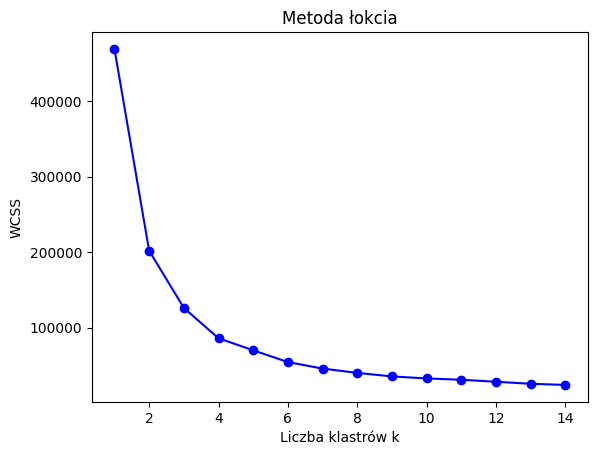

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced_scaled_scaler_pca_2x)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(K, wcss, 'bo-')
plt.xlabel('Liczba klastrów k')
plt.ylabel('WCSS')
plt.title('Metoda łokcia')
plt.show()


#### KMEANS

podział na 6 klastrów

In [10]:
# podział  z użyciem KMeans na danych bez redukcji PCA
from sklearn.cluster import KMeans

# Tworzymy obiekt modelu
kmeans = KMeans(n_clusters=6, random_state=42)

# Dopasowujemy model do danych
kmeans.fit(X_reduced_scaled)

# Przypisanie etykiet klastra do każdej próbki
labels = kmeans.labels_
print(labels[:100])
# np. [0, 2, 1, 1, 0, 3, 4, 5, 2, 0, ...]


[0 0 0 4 0 4 0 0 4 0 0 4 4 4 0 0 0 0 4 4 4 4 4 4 4 4 4 5 5 5 1 1 5 5 5 4 4
 4 5 5 4 4 4 4 4 4 4 4 4 4 4 5 5 4 4 4 4 4 4 4 4 4 4 4 5 5 1 1 5 1 5 5 5 5
 5 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [11]:
# podział  z użyciem KMeans na danych z redukcji PCA do 2 zmiennych 
from sklearn.cluster import KMeans

# Tworzymy obiekt modelu
kmeans = KMeans(n_clusters=6, random_state=42)

# Dopasowujemy model do danych
kmeans.fit(X_reduced_scaled_scaler_pca_2x)

# Przypisanie etykiet klastra do każdej próbki
labels = kmeans.labels_
print(labels[:100])
# np. [0, 2, 1, 1, 0, 3, 4, 5, 2, 0, ...]

[0 0 0 4 4 4 0 0 0 0 0 4 4 4 3 0 0 0 4 4 4 4 4 4 4 4 4 3 3 0 3 3 3 3 0 4 4
 4 3 0 0 4 4 0 4 4 4 4 4 4 4 3 0 4 4 4 4 4 4 4 4 4 4 4 3 3 1 1 3 1 1 1 3 3
 0 0 4 4 2 2 2 5 2 5 2 2 2 2 2 2 2 5 2 2 2 5 2 5 2 2]


In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# wiualizacja podziału oparta o model KMEANS i redukcje wymiaru pca (do 2 zmiennych) 
# Redukcja PCA do 2 zmiennych nie opisuje wystarczając zmienności, ale była użyta do wizualizacji

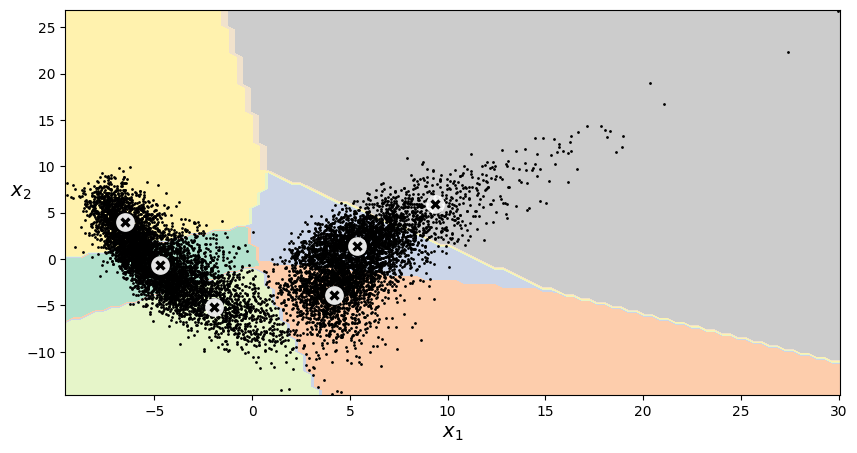

In [13]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(kmeans, X_reduced_scaled_scaler_pca_2x)
plt.show()

#### DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
import numpy as np


target_clusters = 6

for eps in np.arange(0.1, 50.0, 1.0):
    db = DBSCAN(eps=float(eps), min_samples=3)
    labels = db.fit_predict(X_reduced_scaled_scaler_pca_30x)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Wyświetlanie informacji w każdym przebiegu pętli
    print(f"eps={eps:.2f}, liczba klastrów={n_clusters}")
    
    if n_clusters == target_clusters:
        print(f"\nDla eps={eps:.2f} znaleziono dokładnie {n_clusters} klastrów.")
        break


eps=0.10, liczba klastrów=0
eps=1.10, liczba klastrów=0
eps=2.10, liczba klastrów=0
eps=3.10, liczba klastrów=0
eps=4.10, liczba klastrów=5
eps=5.10, liczba klastrów=106
eps=6.10, liczba klastrów=107
eps=7.10, liczba klastrów=104
eps=8.10, liczba klastrów=50
eps=9.10, liczba klastrów=7
eps=10.10, liczba klastrów=6

Dla eps=10.10 znaleziono dokładnie 6 klastrów.


In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 10.10, min_samples=3)
labels = dbscan.fit_predict(X_reduced_scaled_scaler_pca_30x)



In [16]:
# sprawdzanie ilości klastrów
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Liczba klastrów: {n_clusters}")
print(f"Liczba punktów uznanych za szum: {n_noise}")

Liczba klastrów: 6
Liczba punktów uznanych za szum: 637


In [17]:
print(labels[:100])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0 -1 -1 -1
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [18]:
# liczebność klastrów
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 637, 9645,    3,    5,    3,    3,    3]))

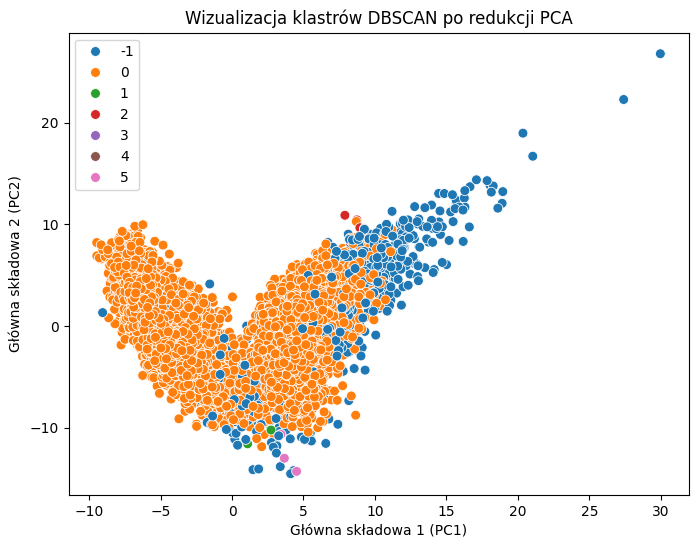

In [19]:
#wizualizacja



# Redukcja do 2 wymiarów PCA (tylko do wizualizacji)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced_scaled)

# Wykres
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1],
    hue=labels,
    palette='tab10', 
    s=50,
    legend='full'
)

plt.title("Wizualizacja klastrów DBSCAN po redukcji PCA")
plt.xlabel("Główna składowa 1 (PC1)")
plt.ylabel("Główna składowa 2 (PC2)")
plt.show()


In [20]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

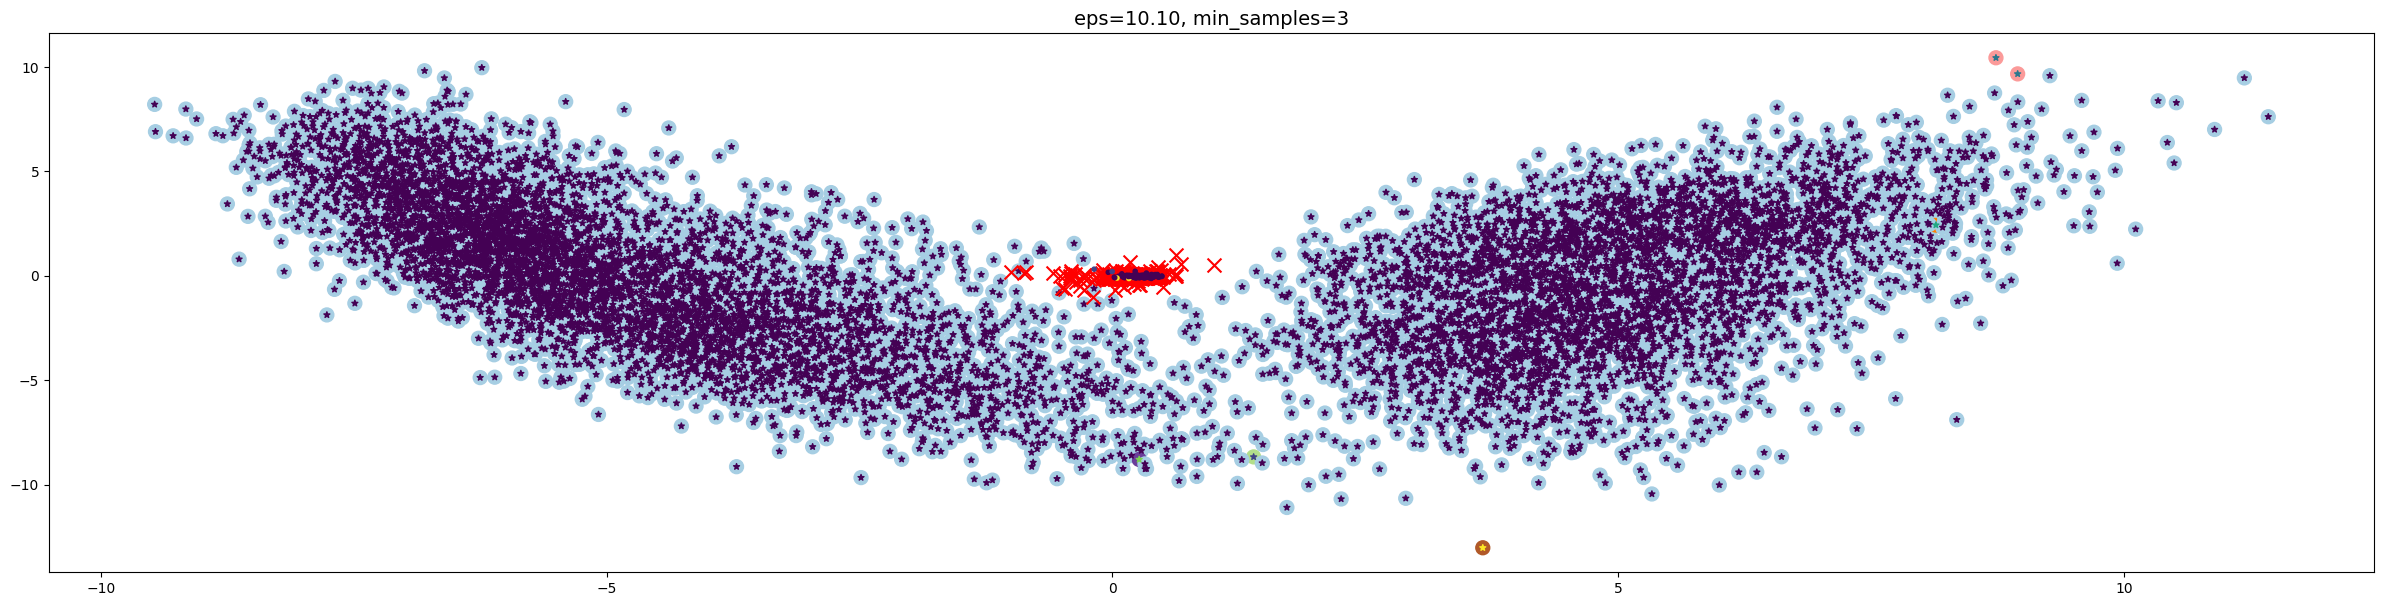

In [21]:
plt.figure(figsize=(30, 7))

#plt.subplot(121)
plot_dbscan(dbscan, X.values, size=100)


# supervised

In [22]:
# wczytywanie danych
samsung_x_train = pd.read_csv('samsung_train.txt',delim_whitespace=True, header=None)
samsung_y_train = pd.read_csv('samsung_train_labels.txt',delim_whitespace=True, header=None)

samsung_x_test = pd.read_csv('samsung_test.txt',delim_whitespace=True, header=None)
samsung_y_test = pd.read_csv('samsung_test_labels.txt',delim_whitespace=True, header=None)

C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  samsung_x_train = pd.read_csv('samsung_train.txt',delim_whitespace=True, header=None)
C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  samsung_y_train = pd.read_csv('samsung_train_labels.txt',delim_whitespace=True, header=None)
C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  samsung_x_test = pd.read_csv('samsung_test.txt',delim_whitespace=True, header=None)
C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1068195464.py:6: FutureWarning: The 'delim_whitespace' key

In [23]:
# do dalszej anlizy chce użyć połaczonych zbiorów, które pozniej po redukcji wymiaru podziele na zbiory testowe i treningowe
samsung_X_df = pd.concat([samsung_x_train, samsung_x_test], axis=0).reset_index(drop=True)
samsung_y_df = pd.concat([samsung_y_train, samsung_y_test], axis=0).reset_index(drop=True)



In [24]:
samsung_X_df.shape

(10299, 561)

In [25]:
samsung_y_df.shape

(10299, 1)

In [26]:
samsung_df = pd.concat([samsung_X_df.reset_index(drop=True),samsung_y_df.rename(columns={samsung_y_df.columns[0]: 'label'}).reset_index(drop=True)],
    axis=1
)



In [27]:
samsung_df.shape

(10299, 562)

In [28]:
samsung_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,5
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,5
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,5
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,5
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,5


In [29]:
#samsung_test_df.shape

In [30]:
#samsung_test_df.head()

In [31]:
# usuwam skorelowane redundantne kolumny w samsung_x_train i samsung_x_test
# Oblicz macierz korelacji
corr_matrix = samsung_x_train.corr().abs()

# Górna trójkątna macierz, żeby uniknąć duplikatów
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Próg korelacji
threshold = 0.80

# Wybierz kolumny do usunięcia
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

# Usuń kolumny
samsung_x_train_reduced = samsung_x_train.drop(columns=to_drop)

print(f"Usunięto {len(to_drop)} kolumn o silnej korelacji: {to_drop}")
print(f"Nowy wymiar danych: {samsung_x_train_reduced.shape}")

Usunięto 416 kolumn o silnej korelacji: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 34, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 66, 67, 68, 70, 71, 72, 74, 75, 76, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 113, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 146, 150, 154, 155, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 189, 191, 193, 194, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 239, 240, 241, 242, 243, 244, 245, 246, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 297, 299, 301, 302, 303, 304, 3

##### usuwam zmienne silnie skorelowane - redukuje ilość zmiennych

In [32]:
import pandas as pd
import numpy as np



#  Oddzielenie kolumn y
y = samsung_df['label']
X = samsung_df.drop(columns=['label'])

#  Oblicamz macierz korelacji
corr_matrix = X.corr().abs()

#  Wybieram górny trójkąt macierzy (żeby nie dublować par)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Znajduję kolumny, które mają korelację > progu (np. 0.85)
threshold = 0.80
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

#  Usuwam te kolumny z X, a potem łaczę z powrotem z y
X_reduced = X.drop(columns=to_drop)



In [33]:
#### przeprowadzam skalowanie zmiennych X
# skalowanie zmiennych
from sklearn.preprocessing import StandardScaler

# Tworzymy obiekt skalera
scaler = StandardScaler()

# Dopasowanie i przekształcenie danych
scaled_array = scaler.fit_transform(X_reduced)

# Tworzymy nowy DataFrame z tymi samymi nazwami kolumn
X_reduced_scaled = pd.DataFrame(scaled_array, columns=X_reduced.columns)

print(X_reduced_scaled)

            0         1         2         3         25        28        29   \
0      0.210534 -0.068703 -0.452195 -0.883335  3.406648 -0.778022  1.126231   
1      0.060208  0.035902 -0.275222 -0.890098  2.374280  0.700739  0.571360   
2      0.078460 -0.046427 -0.085548 -0.883565  1.273873 -1.235769  0.184032   
3      0.071375 -0.227794 -0.270741 -0.885188  0.586241 -1.664883  0.401738   
4      0.033738  0.031617 -0.121380 -0.889855  1.404682 -0.151257  1.129075   
...         ...       ...       ...       ...       ...       ...       ...   
10294  0.529503 -0.960174  0.185107  0.729285 -0.707220 -0.224431 -0.769440   
10295  1.316644 -0.578309  0.056759  0.689343 -0.073752  0.051557 -0.557853   
10296  1.118216  1.288059 -0.129415  0.634062  0.084108 -1.058551 -0.345541   
10297 -0.543493  0.975327  0.234320  0.648934  0.061199 -1.408060 -0.407453   
10298 -1.785153 -0.018666 -0.529760  0.633133 -0.460646 -1.176999 -0.837652   

            31        32        33   ...       532 

#### redukcja wymiarów z uzyciem PCA

In [34]:
# redukcja do 2 zmiennych na potrzeby wizualizacji

scaler = StandardScaler()
X_reduced_scaled_scaler = scaler.fit_transform(X_reduced_scaled)
pca_2x = PCA(n_components=2, random_state=42)
X_reduced_scaled_pca_2x = pd.DataFrame(pca_2x.fit_transform(X_reduced_scaled_scaler))


X_reduced_scaled_scaler_2 = scaler.fit_transform(X_reduced_scaled)
pca_10x = PCA(n_components=10, random_state=42)
X_reduced_scaled_pca_10x = pd.DataFrame(pca_10x.fit_transform(X_reduced_scaled_scaler_2))




print("Łączna wyjaśniona wariancja dla pca 2 zmiennych:", pca_2x.explained_variance_ratio_.sum())

print("Łączna wyjaśniona wariancja dla pca 10 zmiennych:", pca_10x.explained_variance_ratio_.sum())

Łączna wyjaśniona wariancja dla pca 2 zmiennych: 0.22424053306380634
Łączna wyjaśniona wariancja dla pca 10 zmiennych: 0.4193609423664628


#### do dalszej analizy uzywam 10 zmiennych

In [35]:
samsung_df_reduced = pd.concat([X_reduced_scaled_pca_10x, y], axis=1)

print(f"Usunięto {len(to_drop)} kolumn: {to_drop}")

Usunięto 417 kolumn: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 30, 34, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 59, 60, 61, 66, 67, 68, 70, 71, 72, 74, 75, 76, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 113, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 146, 150, 154, 155, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 189, 191, 193, 194, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 239, 240, 241, 242, 243, 244, 245, 246, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 297, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309,

In [36]:
samsung_df_reduced.shape

(10299, 11)

In [37]:
samsung_df_reduced.head()

,0,1,2,3,4,5,6,7,8,9,label
0,-6.150521,-2.649608,-0.226167,5.773974,1.085045,0.408401,0.140565,0.480775,1.375861,1.039568,5
1,-4.611223,-2.133754,-3.322357,2.853482,0.225356,-0.275111,1.061495,0.360338,-0.090144,1.299897,5
2,-5.029749,-0.726035,-3.091350,3.188835,0.897364,-0.826149,1.007351,-0.743912,0.767773,-1.098973,5
3,-5.972501,0.339350,-1.464342,3.463696,0.828557,-0.957242,-0.830719,-0.025906,1.451524,-0.345755,5
4,-5.366450,0.639997,-3.343398,1.270278,1.306562,-0.838031,-0.971927,0.865616,1.208364,0.724212,5


In [38]:
pd.Series(y).value_counts(normalize=True)

label
6    0.188756
5    0.185067
4    0.172541
1    0.167201
2    0.149917
3    0.136518
Name: proportion, dtype: float64

#### funkcje na potrzeby obliczania metryk

In [39]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

In [40]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    global metrics_dataframe
    models.append(model)
    models_names.append(name)

    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba)

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

    # ROC curves (dla wieloklasowej – osobno dla każdej klasy)
    n_classes = predictions_proba.shape[1]
    y_bin = pd.get_dummies(y_checked)  # binarizacja etykiet

    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin.iloc[:, i], predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    # metryki globalne
    f1_metric = f1_score(y_checked, predictions, average='weighted')
    auc_metric = roc_auc_score(y_bin, predictions_proba, multi_class='ovr', average='weighted')

    metrics_dataframe = pd.concat([
        metrics_dataframe,
        pd.DataFrame([{'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric}])
    ], ignore_index=True)

    return metrics_dataframe

#### przygotowanie danych testowych i treningowych


In [41]:
from sklearn.model_selection import train_test_split
X = samsung_df_reduced.drop(['label'], axis=1).copy()
y = samsung_df_reduced['label'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#### Budowanie pipelinu z modelem SVC

In [42]:
# Preprocessing

#num_features = ['0', '1', '2', '3','4', '5', '6', '7','8', '9']
num_features = [0,1,2,3,4,5,6,7,8,9]


# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])



# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
  
])
# budowa Pipeline
model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model z pipeline svc',SVC(kernel='rbf', probability=True) )])

In [43]:
### trening

model_pipeline_v1.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model z pipeline svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_preprocessing', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           1       0.88      0.89      0.88       431
           2       0.90      0.91      0.91       386
           3       0.82      0.82      0.82       351
           4       0.74      0.71      0.73       444
           5       0.81      0.82      0.81       477
           6       0.92      0.95      0.94       486

    accuracy                           0.85      2575
   macro avg       0.85      0.85      0.85      2575
weighted avg       0.85      0.85      0.85      2575



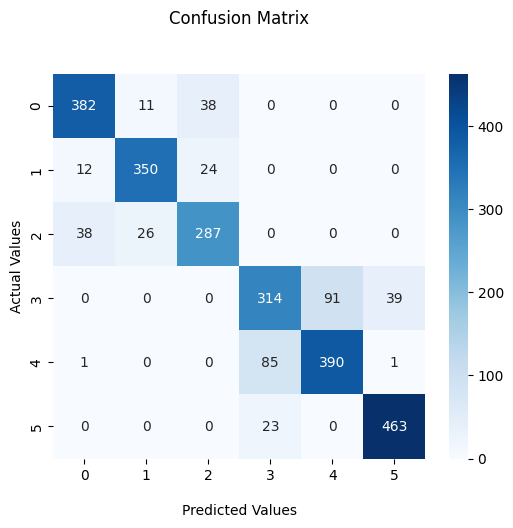

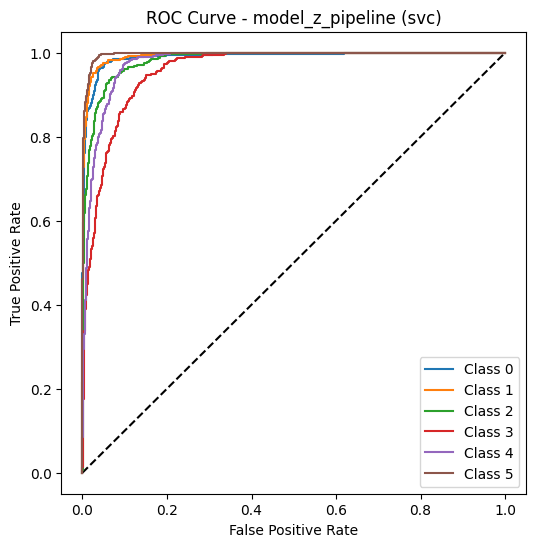

C:\Users\monas\AppData\Local\Temp\ipykernel_9648\1521408564.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([


,Model,F1_score,AUC
0,model_z_pipeline (svc),0.848106,0.983132


In [44]:
# obliczanie metryk
calculate_metrics(model_pipeline_v1, 'model_z_pipeline (svc)', X_test, y_test)

#### Budowanie pipelinu z modelem AddBoost

In [45]:
# Preprocessing

#num_features = ['0', '1', '2', '3','4', '5', '6', '7','8', '9']
num_features = [0,1,2,3,4,5,6,7,8,9]


# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])



# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
  
])
# budowa Pipeline
model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('addBoost',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=12), n_estimators=250,learning_rate=0.1,random_state=42) )])

In [46]:
### trening

model_pipeline_v2.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('addBoost', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_preprocessing', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           1       0.90      0.88      0.89       431
           2       0.88      0.90      0.89       386
           3       0.82      0.82      0.82       351
           4       0.73      0.68      0.71       444
           5       0.80      0.81      0.80       477
           6       0.91      0.94      0.92       486

    accuracy                           0.84      2575
   macro avg       0.84      0.84      0.84      2575
weighted avg       0.84      0.84      0.84      2575



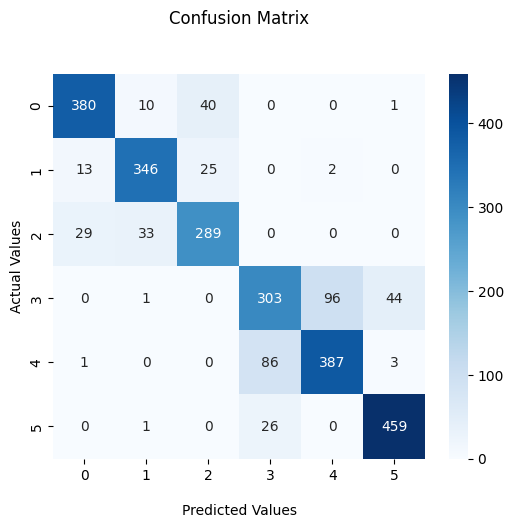

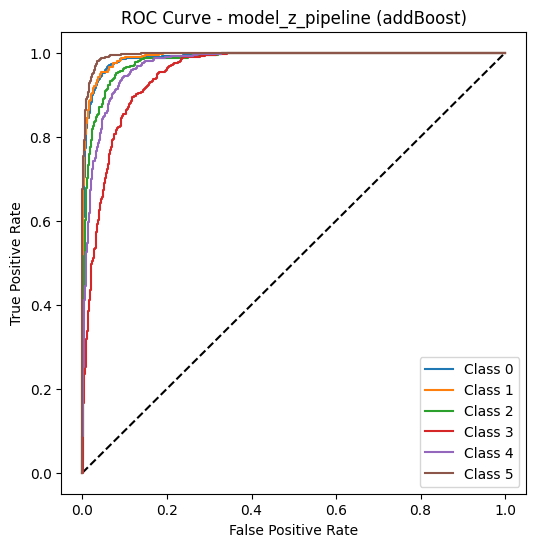

,Model,F1_score,AUC
0,model_z_pipeline (svc),0.848106,0.983132
1,model_z_pipeline (addBoost),0.839382,0.980847


In [47]:
# obliczanie metryk
calculate_metrics(model_pipeline_v2, 'model_z_pipeline (addBoost)', X_test, y_test)

1. KMeans

Rodzaj metody: Klasteryzacja (unsupervised learning)

Cel: Grupowanie danych w „K” klastrów, gdzie elementy w jednym klastrze są do siebie jak najbardziej podobne.

Jak działa:

  -Wybiera się liczbę klastrów K
  -Losowo inicjalizuje się K centroidów (środków klastrów).
  -Każdy punkt przypisuje się do najbliższego centroidu.
  -Centroidy są przesuwane do średniej pozycji punktów w klastrze.

Powtarza się kroki 3–4 aż do zbieżności (czyli centroidy nie zmieniają już pozycji znacząco).

Zastosowanie: Segmentacja klientów, grupowanie dokumentów, analiza obrazów.

2. K-Fold Cross-Validation

Rodzaj metody: Walidacja modelu (statystyczna metoda oceny modeli)

Cel: Ocenić, jak dobrze model generalizuje na nowych danych.

Jak działa:
- Dzieli dane na K równych „foldów” (części).
- Dla każdego folda:
	a) Model trenuje się na pozostałych K-1 foldach
        b) Testuje się go na foldzie, który został odłożony.
 - Oblicza się średnią wyników testu z wszystkich foldów.

Zastosowanie: Wybór najlepszego modelu, tuning hiperparametrów, ocena stabilności modelu.

3. K Nearest Neighbors (KNN)

 - Rodzaj metody: Klasyfikacja lub regresja (supervised learning)
 - Cel: Przewidzieć etykietę (klasę) lub wartość dla nowego punktu na podstawie jego K najbliższych sąsiadów w zbiorze treningowym.
 - Jak działa:
     a) Wybiera się liczbę K sąsiadów.
     b) Dla nowego punktu oblicza się odległość (np. euklidesową) do wszystkich punktów treningowych.
     c) Wybiera się K najbliższych punktów.
     d) Klasyfikacja: Przewiduje się klasę na podstawie większości wśród sąsiadów.
        Regresja: Oblicza się średnią wartości sąsiadów.
Zastosowanie: Rozpoznawanie obrazów, rekomendacje, diagnoza medyczna.